In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.linalg import svd

from src.utils.baselines import laplacian_spectrum_similarity, NCPD, CUMSUM, CUMSUM_2, avg_deltacon_similarity, avg_wl_distance, avg_frobenius_distance, avg_procrustes_distance, \
    distance_procrustes_LE, evaluate_baseline
from src.utils.functions import dist_labels_to_changepoint_labels, normalise_statistics

## Traditional Network Metrics

In [7]:
with open('../graphs/exports_graphs.pkl', 'rb') as file:
    data = pkl.load(file)

true_cps = [1962, 1967, 1973, 1978, 1981, 1989, 1993, 1996, 2002, 2007, 2012, 2014, 2016]

phases = []
p = 0
for i, g in enumerate(data):
    year = i+1962
    if year in true_cps and year != 1962:
        p += 1
        
    phases.append(p)

true_labels = dist_labels_to_changepoint_labels(phases)

In [8]:
lad, lad_times = laplacian_spectrum_similarity(data, window_length=3,normalize=True, n_eigen=3)
lad_times = [x+1962 for x in lad_times]

cusum, cusum_times = CUMSUM(data, window_length=3)
cusum_times = [x+1962 for x in cusum_times]

cusum_2, cusum_2_times = CUMSUM_2(data, window_length=3)
cusum_2_times = [x+1962 for x in cusum_2_times]

deltacon, dc_times = avg_deltacon_similarity(data, window_length=3,diff=True)
deltacon_times = [x+1962 for x in dc_times]

frobenius, fb_times = avg_frobenius_distance(data, window_length=3,diff=True)
fb_times = [x+1962 for x in fb_times]

wl_distance, wl_times = avg_wl_distance(data, window_length=3,diff=True)
wl_times = [x+1962 for x in wl_times]

In [9]:
lad_norm = normalise_statistics(lad)
cusum_norm = normalise_statistics(cusum)
cusum_2_norm = normalise_statistics(cusum_2)
deltacon_norm = normalise_statistics(deltacon)
frobenius_norm = normalise_statistics(frobenius)
wl_distance_norm = normalise_statistics(wl_distance)

In [10]:
detected_cps = []
for method in ['lad', 'cusum', 'cusum_2', 'deltacon','frobenius', 'wl']:
    ari, f1, cps = evaluate_baseline(method, test_data=data, test_labels=phases, window_length=3, tolerance=3, n_eigen=4, diff=True)
    detected_cps.append(cps)
    print("Method : ", method)
    print("F1 test and ARI test : ", f1, ari)

Method :  lad
F1 test and ARI test :  0.38095238095238093 0.24619667657752156
Method :  cusum
F1 test and ARI test :  0.6 0.43535298134073586
Method :  cusum_2
F1 test and ARI test :  0.36923076923076925 0.13694519691602416
Method :  deltacon
F1 test and ARI test :  0.4210526315789474 0.2576143624318921
Method :  frobenius
F1 test and ARI test :  0.36923076923076925 0.12403432396386421
Method :  wl
F1 test and ARI test :  0.4390243902439025 0.4069533682841263


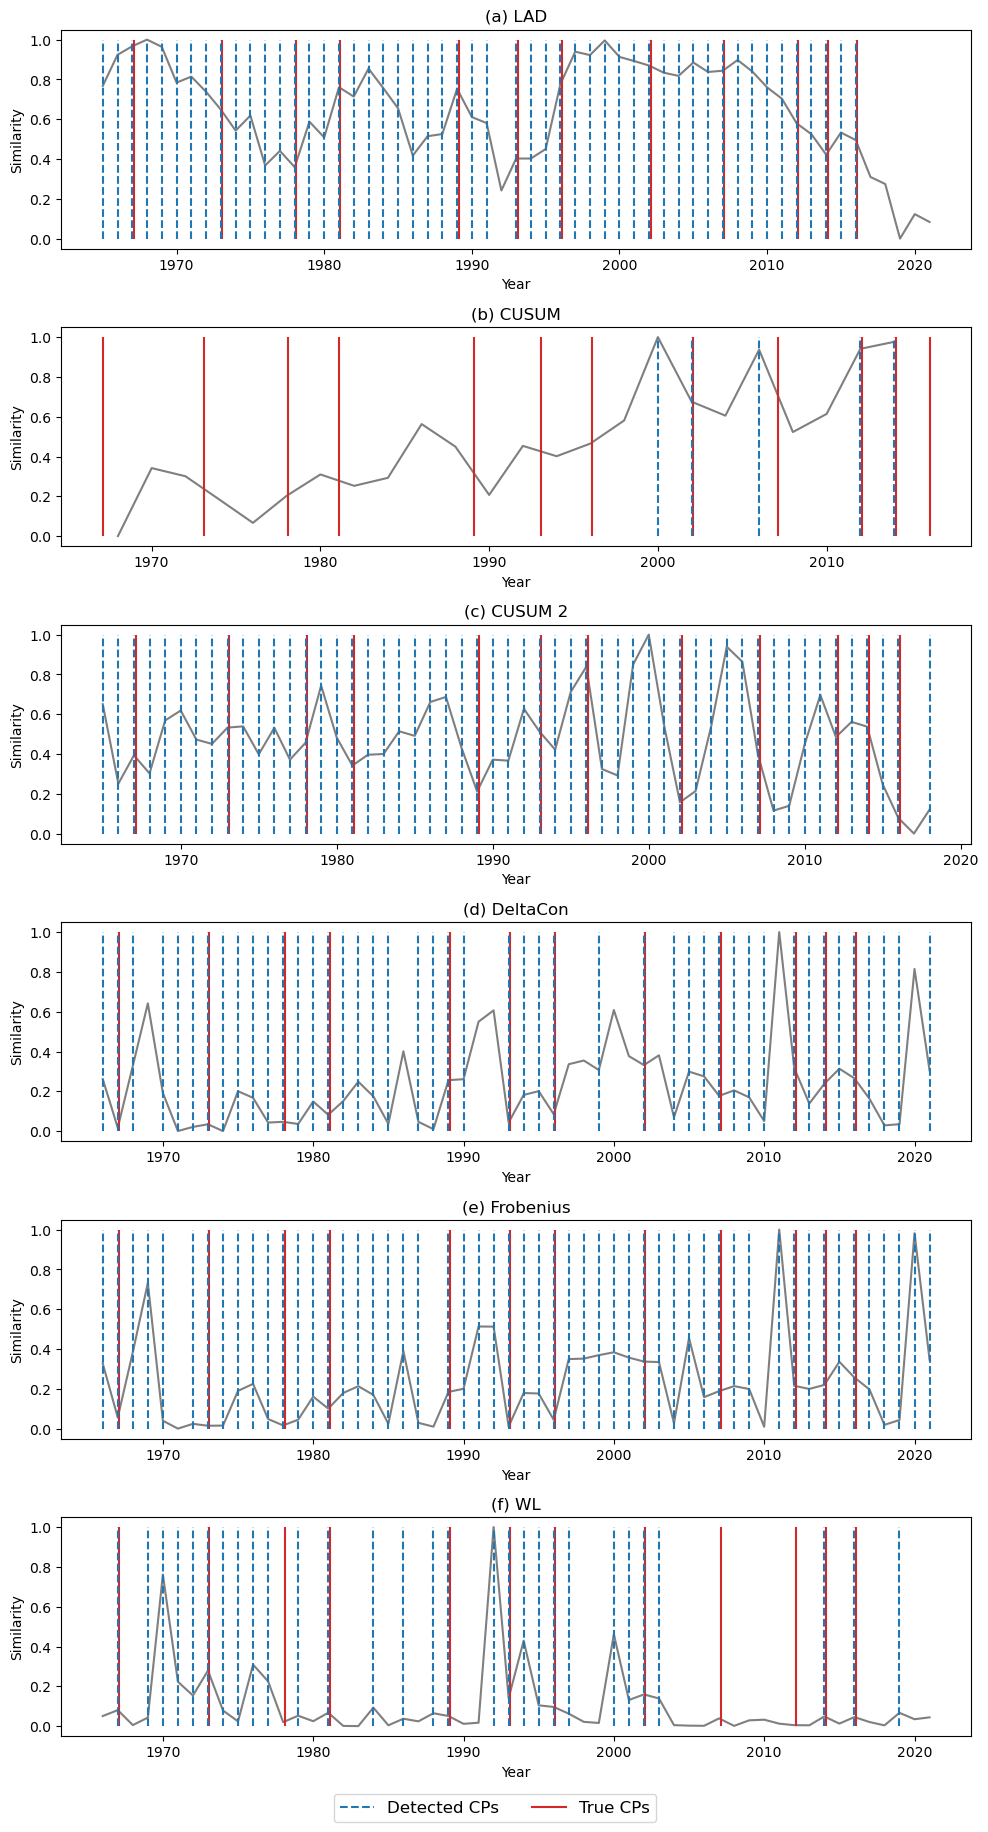

In [11]:
import matplotlib.lines as mlines
fig, axs = plt.subplots(6, 1, figsize=(10,18))

axs[0].plot(lad_times, lad_norm, label='LAD', color='tab:grey')
axs[1].plot(cusum_times, cusum_norm, label='CUSUM', color='tab:grey')
axs[2].plot(cusum_2_times, cusum_2_norm, label='CUSUM_2', color='tab:grey')
axs[3].plot(deltacon_times, deltacon_norm, label='DeltaCon', color='tab:grey')
axs[4].plot(fb_times, frobenius_norm, label='Frobenius', color='tab:grey')
axs[5].plot(wl_times, wl_distance_norm, label='WL', color='tab:grey')

adjusted_cps = [i+0.1 for i in true_cps if i > 1962]
labels = ['(a) LAD', '(b) CUSUM', '(c) CUSUM 2', '(d) DeltaCon', '(e) Frobenius', '(f) WL']
detected_times = [lad_times, cusum_times, cusum_2_times, deltacon_times, fb_times, wl_times]

for i in range(6):
    indices = detected_cps[i]
    selected_values = detected_cps[i]+1962
    
    axs[i].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
    axs[i].vlines(x=selected_values, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
    axs[i].grid(visible=False)
    axs[i].set_xlabel(rf'Year')
    axs[i].set_ylabel(rf'Similarity')
    axs[i].set_title(labels[i])

handles = [mlines.Line2D([], [], color='tab:blue', linestyle='--', label='Detected CPs'),
           mlines.Line2D([], [], color='tab:red', linestyle='-', label='True CPs')]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.02), fontsize='large')

plt.tight_layout()
plt.show()

In [51]:
with open("../results/test_results/NCPD_06_29_10:15:29_window_1_detection/avg_similarity.p", 'rb') as file:
    avg_sim_norm_gdp = pkl.load(file)

In [12]:
with open("../results/test_results/NCPD_06_29_10:45:14_window_1_detection/avg_similarity.p", 'rb') as file:
    avg_sim_norm_nogdp = pkl.load(file)

FileNotFoundError: [Errno 2] No such file or directory: '../results/test_results/NCPD_06_29_10:45:14_window_1_detection/avg_similarity.p'

In [14]:
with open("../results/test_results/NCPD_07_22_16:14:19_window_2_detection/avg_similarity.p", 'rb') as file:
    avg_sim_logged = pkl.load(file)

In [43]:
detected_cps_norm_gdp = [4, 10, 13, 16, 19, 27, 31, 34, 41, 44, 46, 50, 53]
detected_cps_logged = [2, 5, 9, 11, 16, 19, 27, 31, 34, 40, 45, 50, 52]
detected_cps_norm_nogdp = [5, 11, 15, 19, 27, 31, 34, 40, 45, 50]

detected_times_norm_gdp = [i+1962 for i in detected_cps_norm_gdp]
detected_times_logged = [i+1962 for i in detected_cps_logged]
detected_times_norm_no_gdp = [i+1962 for i in detected_cps_norm_nogdp]
times = range(1962,2018)

true_cps = [0, 5, 11, 16, 19, 27, 31, 34, 40, 45, 50, 52, 54]
selected_times = [i+1962 for i in true_cps]

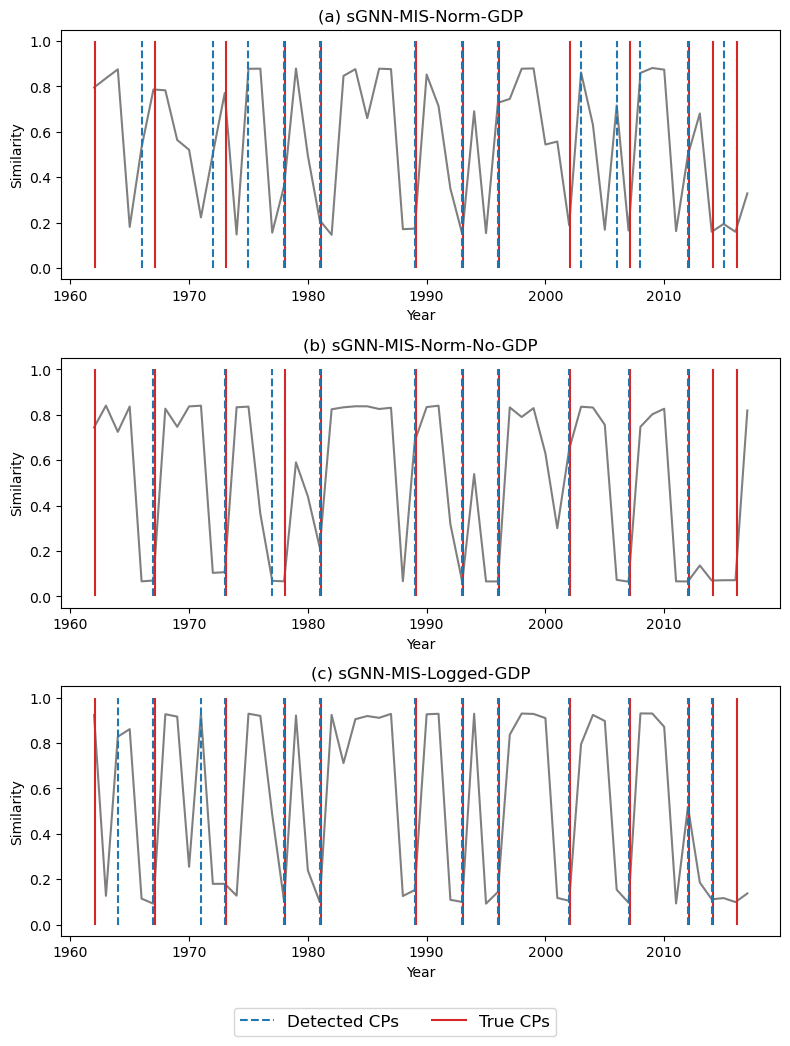

In [60]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(8,10))

# Plot just one line, for example, the LAD line
axs[0].plot(times, avg_sim_norm_gdp, label='sGNN-MIS-Norm-GDP', color='tab:grey')
axs[1].plot(times, avg_sim_norm_nogdp, label='sGNN-MIS-Norm-No-GDP', color='tab:grey')
axs[2].plot(times, avg_sim_logged, label='sGNN-MIS-Logged-GDP', color='tab:grey')

adjusted_cps = [i+0.1 for i in selected_times]

axs[0].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[0].vlines(x=detected_times_norm_gdp, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[0].grid(visible=False)
axs[0].set_xlabel(rf'Year')
axs[0].set_ylabel(rf'Similarity')
axs[0].set_title('(a) sGNN-MIS-Norm-GDP')

axs[1].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[1].vlines(x=detected_times_norm_no_gdp, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[1].grid(visible=False)
axs[1].set_xlabel(rf'Year')
axs[1].set_ylabel(rf'Similarity')
axs[1].set_title('(b) sGNN-MIS-Norm-No-GDP')

axs[2].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[2].vlines(x=detected_times_logged, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[2].grid(visible=False)
axs[2].set_xlabel(rf'Year')
axs[2].set_ylabel(rf'Similarity')
axs[2].set_title('(c) sGNN-MIS-Logged-GDP')

handles = [mlines.Line2D([], [], color='tab:blue', linestyle='--', label='Detected CPs'),
           mlines.Line2D([], [], color='tab:red', linestyle='-', label='True CPs')]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05), fontsize='large')

plt.tight_layout()
plt.show()

In [23]:
detected_cps_logged = [2, 5, 11, 17, 27, 31, 34, 40, 45, 50]
detected_times_logged = [i+1962 for i in detected_cps_logged]

times = range(1962,2017)

true_cps = [0, 5, 11, 16, 19, 27, 31, 34, 40, 45, 50, 52, 54]
selected_times = [i+1962 for i in true_cps]

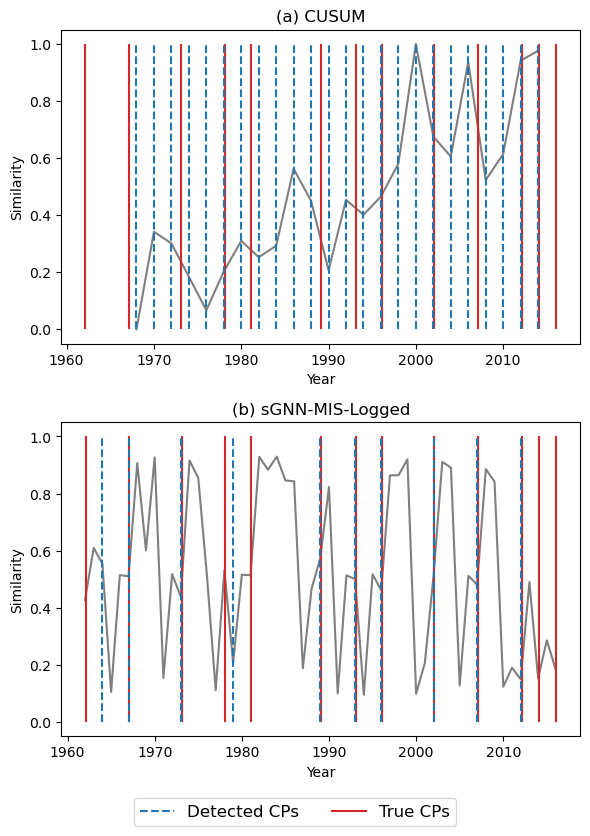

In [30]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(6,8))

# Plot just one line, for example, the LAD line
axs[0].plot(cusum_times, cusum_norm, label='CUSUM', color='tab:grey')
axs[1].plot(times, avg_sim_logged, label='sGNN-MIS-Logged', color='tab:grey')

adjusted_cps = [i+0.1 for i in selected_times]

axs[0].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[0].vlines(x=cusum_times, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[0].grid(visible=False)
axs[0].set_xlabel(rf'Year')
axs[0].set_ylabel(rf'Similarity')
axs[0].set_title('(a) CUSUM')

axs[1].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[1].vlines(x=detected_times_logged, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[1].grid(visible=False)
axs[1].set_xlabel(rf'Year')
axs[1].set_ylabel(rf'Similarity')
axs[1].set_title('(b) sGNN-MIS-Logged')

handles = [mlines.Line2D([], [], color='tab:blue', linestyle='--', label='Detected CPs'),
           mlines.Line2D([], [], color='tab:red', linestyle='-', label='True CPs')]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05), fontsize='large')

plt.tight_layout()
plt.show()

## Window Models

In [2]:
with open("../results/test_results/NCPD_07_01_07:56:13_window_1_detection/avg_similarity.p", 'rb') as file:
    avg_sim_norm_gdp = pkl.load(file)

In [4]:
with open("../results/test_results/NCPD_07_01_08:32:51_window_1_detection/avg_similarity.p", 'rb') as file:
    avg_sim_norm_nogdp = pkl.load(file)

In [5]:
with open("../results/test_results/NCPD_07_01_08:07:52_window_1_detection/avg_similarity.p", 'rb') as file:
    avg_sim_logged = pkl.load(file)

In [3]:
detected_cps_norm_gdp = [1, 8, 10]
detected_cps_logged = [5, 9]
detected_cps_norm_nogdp = [3, 8, 11]

detected_times_norm_gdp = [i+2007 for i in detected_cps_norm_gdp]
detected_times_logged = [i+2007 for i in detected_cps_logged]
detected_times_norm_no_gdp = [i+2007 for i in detected_cps_norm_nogdp]
times = range(2007,2018)

true_cps = [0, 5, 7, 9]
selected_times = [i+2007 for i in true_cps]

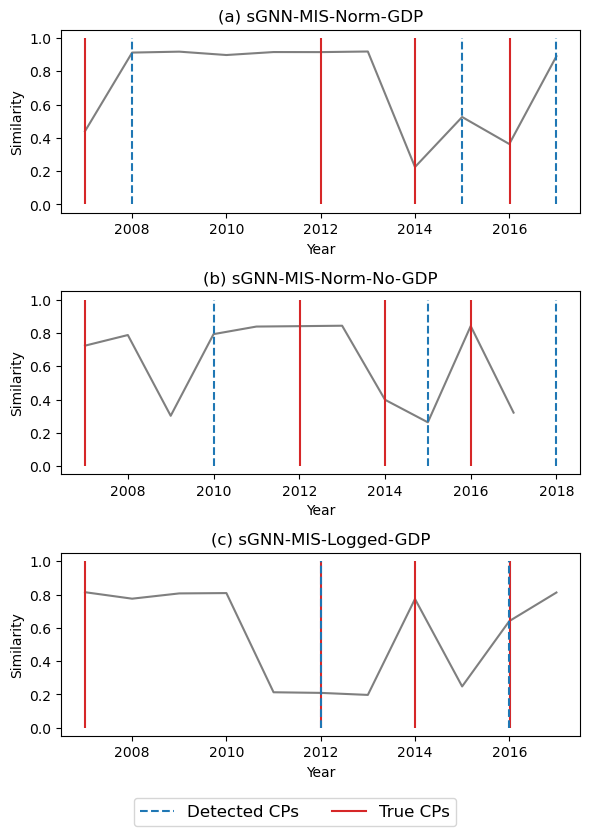

In [11]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(6,8))

# Plot just one line, for example, the LAD line
axs[0].plot(times, avg_sim_norm_gdp, label='sGNN-MIS-Norm-GDP', color='tab:grey')
axs[1].plot(times, avg_sim_norm_nogdp, label='sGNN-MIS-Norm-No-GDP', color='tab:grey')
axs[2].plot(times, avg_sim_logged, label='sGNN-MIS-Logged-GDP', color='tab:grey')

adjusted_cps = [i+0.01 for i in selected_times]

axs[0].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[0].vlines(x=detected_times_norm_gdp, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[0].grid(visible=False)
axs[0].set_xlabel(rf'Year')
axs[0].set_ylabel(rf'Similarity')
axs[0].set_title('(a) sGNN-MIS-Norm-GDP')

axs[1].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[1].vlines(x=detected_times_norm_no_gdp, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[1].grid(visible=False)
axs[1].set_xlabel(rf'Year')
axs[1].set_ylabel(rf'Similarity')
axs[1].set_title('(b) sGNN-MIS-Norm-No-GDP')

axs[2].vlines(x=adjusted_cps, ymin=0, ymax=1, linestyles='solid', label='true CPs', color='tab:red')
axs[2].vlines(x=detected_times_logged, ymin=0, ymax=1, linestyles='dashed', label='Detected CPs', color='tab:blue')
axs[2].grid(visible=False)
axs[2].set_xlabel(rf'Year')
axs[2].set_ylabel(rf'Similarity')
axs[2].set_title('(c) sGNN-MIS-Logged-GDP')

handles = [mlines.Line2D([], [], color='tab:blue', linestyle='--', label='Detected CPs'),
           mlines.Line2D([], [], color='tab:red', linestyle='-', label='True CPs')]

# Add the legend to the figure
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05), fontsize='large')

plt.tight_layout()
plt.show()